# A) Rank HFT data using PCA1 (20 points)
• Add at least 4 variables to the HFT datasets in Quiz 2. One variable should be Bollimg band

• Do dimension reductions for the HFT data

• Rank the importance of all variables

• Rank the importance of the observations

• Can you rank features/observaions using t-SNE, why?

Solution

In [305]:
import matplotlib. pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from pandas.plotting import parallel_coordinates
from sklearn import decomposition

from pylab import *
import warnings
warnings.filterwarnings('ignore')

Adding new variables

In [306]:
def metrics (data):
    data['close_off_high'] = 2*((data['marketHigh']-data['marketClose'])/(data['marketHigh']-data['marketLow']))-1
    data['volatility'] = (data['marketHigh']-data['marketLow'])/data['marketOpen']
    data['true_Range'] = data['marketHigh'] - data['marketLow']
    
    #Bollinger bands
    period = 1 #it is daily data

    data['bollingBand'] = data['marketClose'].rolling(period).mean()
    
    return data

In [307]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

def doNormalization(data, normalization_bit = 1):
  if normalization_bit:
    normalized_data = StandardScaler().fit_transform(data)
  else:
    normalized_data=MinMaxScaler().fit_transform(data)
  return normalized_data

In [308]:
# doPCA
from sklearn.decomposition import PCA

def doPCA (data, normalization_bit=1):
    normalized_data=doNormalization(data,normalization_bit)
    pca=PCA()
    pca.fit(normalized_data)
    newPCAData=pca.transform(normalized_data)
    EVR=pca.explained_variance_ratio_
    pca_components = pca.components_

    return newPCAData, EVR, pca_components

In [372]:
#TSNE
from sklearn.manifold import TSNE

def doTSNE (data, perplexity, init):
    normalized_data = doNormalization(data,1) #StandardScaler normalization
    tsne = TSNE(perplexity=perplexity, init=init)
    newData = tsne.fit_transform(normalized_data)
    #evr = evr.explained_variance_ratio_
    
    #return newData, evr
    return newData

In [376]:
#labeling needed for the biplots
def doLabel(data):
    label=[]
    
    down = (data['marketOpen'] > data['marketClose'])
    label.append(down)
    
    equal = data['marketOpen'] == data['marketClose']
    label.append(equal)
    
    up = data['marketOpen'] < data['marketClose']
    label.append(up)
    
    label_name=['down', 'equal', 'up']
    
    return label, label_name

In [377]:
def biplot(newData, label, label_name, Method):

  marker_list=['o','p','d','s', '>']
  c_list=['b','gold', 'y', 'lightblue', 'deepblue']
  e_list=['k','g', 'b', 'r', 'orange']
  for i in range(len(label)):
    plt.scatter(newData[label[i], 0], newData[label[i], 1], label=label_name[i],
                marker=marker_list[i], color=c_list[i], edgecolors=e_list[i],  s=75)

  plt.legend(prop={'size':12})

  if Method=='pca' or Method=='PCA':
    plt.ylabel('$PC_{2}$')
  elif Method=='spca':
    plt.xlabel('$SPC_{1}$')
    plt.ylabel('$SPC_{2}$')
  else:
    plt.xlabel('$'+ Method +'_{1}'+'$')
    plt.ylabel('$'+ Method +'_{2}'+'$')
  
  plt.grid('on')

In [309]:
filename=['AAPL_n.csv', 'AEO_n.csv', 'BAC_n.csv','WMT_n.csv']

aapl_data = pd.read_csv(filename[0])
aeo_data = pd.read_csv(filename[1])
bac_data = pd.read_csv(filename[2])
wmt_data = pd.read_csv(filename[3])

aapl_data.head(3)

,Unnamed: 0,Date,marketAverage,marketChangeOverTime,marketClose,marketHigh,marketLow,marketNotional,marketNumberOfTrades,marketOpen,marketVolume
0,0,2/1/2019 9:30,167.058,0.000000,167.150,167.55,166.67,1.319461e+08,1766,166.93,789821
1,1,2/1/2019 9:31,167.182,0.000742,167.175,167.42,166.80,2.853055e+07,1143,167.21,170656
2,2,2/1/2019 9:32,167.051,-0.000042,166.910,167.20,166.88,2.232776e+07,1016,167.17,133658


In [310]:
#BookKeeping 
#drop the first two columns and add the variables to the datasets
def bookKeeping (data):
    
    data = metrics(data.iloc[:, 2:].copy())
    return data

In [311]:
aapl_data = bookKeeping(aapl_data)
aeo_data = bookKeeping(aeo_data)
bac_data = bookKeeping(bac_data)
wmt_data = bookKeeping (wmt_data)

wmt_data.head(3)

,marketAverage,marketChangeOverTime,marketClose,marketHigh,marketLow,marketNotional,marketNumberOfTrades,marketOpen,marketVolume,close_off_high,volatility,true_Range,bollingBand
0,95.850,0.000000,95.63,96.00,95.330,24175968.31,686,95.92,252227,0.104478,0.006985,0.670,95.63
1,95.148,-0.007324,94.91,95.92,94.842,13879033.35,1046,95.61,145868,0.873840,0.011275,1.078,94.91
2,94.683,-0.012175,94.57,95.92,94.530,10984547.98,619,94.92,116014,0.942446,0.014644,1.390,94.57


In [312]:
data = aapl_data.copy()
data1 = data.copy()

In [313]:
#Adding the option column- which is the label for the data
data1.loc[data1['marketOpen'] == data1['marketClose'], 'Option'] = 'ATM' #atm
data1.loc[data1['marketOpen'] > data1['marketClose'], 'Option'] = 'ITM' #itm
data1.loc[data1['marketOpen'] < data1['marketClose'], 'Option'] = 'OTM' #atm
data1

,marketAverage,marketChangeOverTime,marketClose,marketHigh,marketLow,marketNotional,marketNumberOfTrades,marketOpen,marketVolume,close_off_high,volatility,true_Range,bollingBand,Option
0,167.058,0.000000,167.150,167.55,166.67,1.319461e+08,1766,166.930,789821,-0.090909,0.005272,0.88,167.150,OTM
1,167.182,0.000742,167.175,167.42,166.80,2.853055e+07,1143,167.210,170656,-0.209677,0.003708,0.62,167.175,ITM
2,167.051,-0.000042,166.910,167.20,166.88,2.232776e+07,1016,167.170,133658,0.812500,0.001914,0.32,166.910,ITM
3,166.945,-0.000676,166.958,167.11,166.77,2.014459e+07,839,166.970,120666,-0.105882,0.002036,0.34,166.958,ITM
4,167.045,-0.000078,167.180,167.19,166.92,1.707804e+07,843,166.960,102236,-0.925926,0.001617,0.27,167.180,OTM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5845,172.607,0.006220,172.595,172.74,172.45,5.664651e+07,2366,172.450,328182,0.000000,0.001682,0.29,172.595,OTM
5846,172.631,0.006360,172.680,172.70,172.58,2.646660e+07,1133,172.595,153313,-0.666667,0.000695,0.12,172.680,OTM
5847,172.690,0.006704,172.670,172.73,172.67,1.727887e+07,690,172.690,100057,1.000000,0.000347,0.06,172.670,ITM
5848,172.677,0.006628,172.720,172.74,172.64,2.521759e+07,1123,172.680,146039,-0.600000,0.000579,0.10,172.720,OTM



Option info

ITM    2909
OTM    2768
ATM     173
Name: Option, dtype: int64


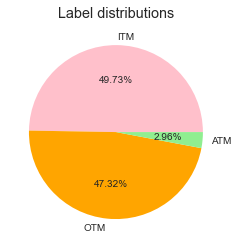

In [314]:
#Label Information

option_counts = data1["Option"].value_counts()
print('\nOption info\n')
print(option_counts)
option_label = option_counts.index

fig = plt.figure(figsize=(6, 4))

sliceColors = ['pink', 'orange', 'lightgreen', 'cyan', 'm',
               'grey', 'yellow','ivory', 'gold', 'lightblue']
plt.pie(option_counts.values, 
        autopct='%.2f%%', 
        labels = option_label,
        colors = sliceColors)
plt.title("Label distributions")
plt.savefig('HFTLabel.png')
plt.show()

PCA analysis

In [315]:
newPCAData, EVR, pca_components = doPCA(data)
pca_components

array([[-4.323e-01, -1.383e-01, -3.197e-01, -4.285e-01, -4.223e-01,
        -3.998e-02, -3.654e-02, -4.318e-01, -3.648e-02,  1.704e-01,
         6.341e-02,  6.225e-02, -3.197e-01],
       [ 8.539e-03,  3.112e-02, -1.494e-02,  2.167e-02, -9.506e-02,
         5.568e-01,  4.786e-01,  8.422e-03,  5.571e-01, -1.102e-02,
         2.641e-01,  2.639e-01, -1.494e-02],
       [ 2.406e-01, -1.491e-01, -4.615e-01,  2.459e-01,  2.302e-01,
         1.371e-02, -7.402e-04,  2.404e-01,  1.176e-02,  5.676e-01,
        -8.214e-03, -7.852e-03, -4.615e-01],
       [ 1.136e-01,  4.153e-02,  8.666e-03,  1.241e-01, -1.585e-01,
        -2.395e-01, -1.761e-01,  1.181e-01, -2.404e-01, -3.435e-02,
         6.257e-01,  6.261e-01,  8.666e-03],
       [ 2.703e-02, -9.764e-01,  1.095e-01,  3.363e-02,  1.864e-02,
         2.878e-02, -2.879e-02,  2.845e-02,  2.819e-02, -1.245e-01,
         2.807e-02,  2.837e-02,  1.095e-01],
       [ 6.550e-03,  4.733e-02,  3.478e-03, -6.976e-03, -1.247e-02,
         3.609e-01, -8.588e

In [316]:
pca_components_df = pd.DataFrame(data=pca_components, index=data.columns, 
      columns=['PC ' + str(i+1) for i in range(data.shape[1])])

pca_components_df

,PC 1,PC 2,PC 3,PC 4,PC 5,PC 6,PC 7,PC 8,PC 9,PC 10,PC 11,PC 12,PC 13
marketAverage,-4.323440e-01,-1.383394e-01,-0.319660,-0.428491,-0.422339,-3.998187e-02,-3.653967e-02,-4.317503e-01,-3.647991e-02,1.703899e-01,6.340816e-02,0.062253,-0.319660
marketChangeOverTime,8.538831e-03,3.111576e-02,-0.014938,0.021673,-0.095059,5.568180e-01,4.785832e-01,8.421526e-03,5.570917e-01,-1.102275e-02,2.641158e-01,0.263852,-0.014938
marketClose,2.405807e-01,-1.491053e-01,-0.461493,0.245933,0.230246,1.370774e-02,-7.401685e-04,2.403951e-01,1.175662e-02,5.676212e-01,-8.214163e-03,-0.007852,-0.461493
marketHigh,1.135795e-01,4.152540e-02,0.008666,0.124084,-0.158540,-2.394524e-01,-1.761339e-01,1.180599e-01,-2.404348e-01,-3.434554e-02,6.256656e-01,0.626058,0.008666
marketLow,2.702998e-02,-9.764380e-01,0.109533,0.033627,0.018644,2.878073e-02,-2.878597e-02,2.844738e-02,2.819301e-02,-1.245427e-01,2.807294e-02,0.028370,0.109533
marketNotional,6.550458e-03,4.732844e-02,0.003478,-0.006976,-0.012470,3.609279e-01,-8.587634e-01,6.560806e-03,3.596039e-01,3.716506e-03,1.348114e-02,0.013843,0.003478
marketNumberOfTrades,-2.406382e-02,-1.542479e-02,0.412996,-0.124416,-0.123683,-7.090047e-04,8.375332e-03,-2.105672e-02,-6.932010e-04,7.912550e-01,1.601109e-02,0.020490,0.412996
marketOpen,-4.579120e-01,5.163066e-03,0.044331,0.533611,0.452796,-3.489892e-03,-1.500244e-02,-5.222257e-01,2.116699e-03,7.651576e-02,9.815715e-02,0.090246,0.044331
marketVolume,-7.284932e-01,1.161020e-03,0.001032,0.029096,0.016566,-3.634135e-03,-4.983537e-05,6.834634e-01,5.165955e-03,1.964999e-03,-2.127515e-02,0.023550,0.001032
close_off_high,1.592666e-02,2.345638e-04,-0.001202,0.133576,-0.140284,2.769870e-01,5.577911e-04,-2.327460e-02,-2.771091e-01,-1.979910e-03,-6.656006e-01,0.604268,-0.001202


In [317]:
EVR

array([3.424e-01, 2.028e-01, 1.849e-01, 1.566e-01, 6.892e-02, 3.404e-02,
       9.786e-03, 4.593e-04, 4.799e-05, 3.416e-06, 2.584e-06, 5.594e-28,
       8.248e-34])

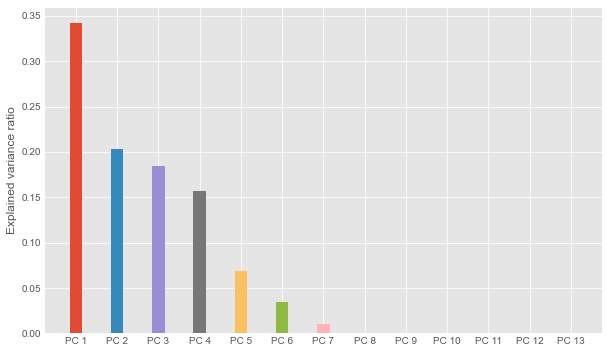

In [318]:
# Explained variance ratio plot
Elp_ratio = EVR
PC_list=['PC '+ str(i+1) for i in range(len(EVR))]

fig0=plt.figure(figsize=(10,6))
#plt.style.use('ggplot')

x_tick=np.arange(len(PC_list))


for i in range(len(x_tick)):
  plt.bar(x_tick[i], Elp_ratio[i], width=0.3)
plt.xticks(x_tick, PC_list)
plt.ylabel('Explained variance ratio')
plt.savefig('HFT_EVR.png')
plt.show()

In [319]:
option_logical_label={}

for i in range(len(option_counts.values)):
  option_logical_label[i]=data1["Option"] == option_counts.index[i]      

In [320]:
#Check the option in the labels
def label_options(i):
    
  for k in range(len(option_counts.values)):
    if option_logical_label[k][i] == True:
      return k

In [321]:
#Rank features
newPCAData_df = pd.DataFrame(data = newPCAData, 
                           columns=['PC ' + str(i) for i in range(newPCAData.shape[1])], 
                           index=data.index)

newPCAData_df.head()

,PC 0,PC 1,PC 2,PC 3,PC 4,PC 5,PC 6,PC 7,PC 8,PC 9,PC 10,PC 11,PC 12
0,3.603037,12.140323,-1.468152,-4.245054,0.300681,2.192419,0.083394,0.188852,-0.029797,-0.071990,0.131567,-5.777779e-14,1.165894e-15
1,4.067192,3.027245,-1.609901,-0.849995,-0.159565,-1.154060,0.061122,0.042871,0.015723,-0.017002,0.013457,-6.915809e-14,7.899674e-16
2,4.198588,2.142111,-1.588561,-1.075937,-0.103339,-1.112215,0.025353,-0.026301,0.050744,-0.008781,0.009556,-7.351790e-14,6.926120e-16
3,4.363220,1.704453,-1.662579,-0.889158,-0.010165,-0.714723,0.040074,0.021471,0.013518,-0.007607,0.007952,-7.237566e-14,3.435210e-16
4,4.250583,1.424355,-1.682420,-0.895102,-0.095060,-0.877897,0.047746,0.046131,-0.030364,-0.002948,0.005433,-7.264247e-14,6.702598e-16


In [322]:
newPCAData_df['Rank'] = newPCAData_df.apply(lambda x: np.sqrt(x.dot(x)), axis=1)
newPCAData_df.head(5)

,PC 0,PC 1,PC 2,PC 3,PC 4,PC 5,PC 6,PC 7,PC 8,PC 9,PC 10,PC 11,PC 12,Rank
0,3.603037,12.140323,-1.468152,-4.245054,0.300681,2.192419,0.083394,0.188852,-0.029797,-0.071990,0.131567,-5.777779e-14,1.165894e-15,13.620146
1,4.067192,3.027245,-1.609901,-0.849995,-0.159565,-1.154060,0.061122,0.042871,0.015723,-0.017002,0.013457,-6.915809e-14,7.899674e-16,5.512181
2,4.198588,2.142111,-1.588561,-1.075937,-0.103339,-1.112215,0.025353,-0.026301,0.050744,-0.008781,0.009556,-7.351790e-14,6.926120e-16,5.210540
3,4.363220,1.704453,-1.662579,-0.889158,-0.010165,-0.714723,0.040074,0.021471,0.013518,-0.007607,0.007952,-7.237566e-14,3.435210e-16,5.100090
4,4.250583,1.424355,-1.682420,-0.895102,-0.095060,-0.877897,0.047746,0.046131,-0.030364,-0.002948,0.005433,-7.264247e-14,6.702598e-16,4.951070


In [323]:
print('Top 20 features sorted by Ranking')
ranking_20 = newPCAData_df.Rank.sort_values(ascending=False)[0:20]
print(ranking_20)

Top 20 features sorted by Ranking
3900    71.667007
1810    51.656733
1768    51.255926
1035    39.755829
857     33.471579
948     32.255337
3225    27.112328
767     26.519946
4290    19.370355
780     19.056668
4736    18.665505
1802    18.286881
1560    17.692296
1923    17.563251
1170    16.715667
1950    15.879150
2339    15.606135
1843    14.921793
1815    14.885401
3510    14.835736
Name: Rank, dtype: float64


In [324]:
# barplot
def barplot_(data_label, data, ylabel):

  fig=plt.figure(figsize=(10,6))
  plt.style.use('seaborn-whitegrid')
  x_tick=np.arange(len(data_label))

  for i in range(len(x_tick)):
    plt.bar(x_tick[i], data[i])

  plt.xticks(x_tick, data_label)
  plt.ylabel(ylabel, FontSize=12)

  ax=plt.gca()
  
  for xtk_label in ax.get_xticklabels():
    xtk_label.set_rotation(45)
  
  for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(12)

  plt.show()

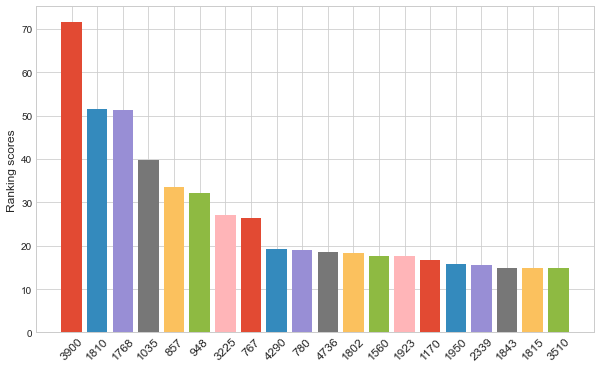

In [325]:
# draw barplot for top 20 rankings
bar_data_label=ranking_20.index.values
bar_data=ranking_20.tolist()
ylabel='Ranking scores'
barplot_(bar_data_label, bar_data, ylabel)

Dimension Reduction

In [328]:
# do dimension reduction 
dim=-1

CumExpVarRatios = np.cumsum(EVR)
print(CumExpVarRatios)
cutoff=0.90

for k in range(len(CumExpVarRatios)):
  if CumExpVarRatios[k] > cutoff:
    dim=k
    break
print('\n We pick the first ' +str(k+1) + "  PCs\n")



[0.342 0.545 0.73  0.887 0.956 0.99  0.999 1.    1.    1.    1.    1.
 1.   ]

 We pick the first 5  PCs



In [329]:
reduced_data_df = newPCAData_df.iloc[:, 0:dim+1]
reduced_data_df

,PC 0,PC 1,PC 2,PC 3,PC 4
0,3.603037,12.140323,-1.468152,-4.245054,0.300681
1,4.067192,3.027245,-1.609901,-0.849995,-0.159565
2,4.198588,2.142111,-1.588561,-1.075937,-0.103339
3,4.363220,1.704453,-1.662579,-0.889158,-0.010165
4,4.250583,1.424355,-1.682420,-0.895102,-0.095060
...,...,...,...,...,...
5845,-2.329960,6.682375,0.282142,-2.320025,-0.386710
5846,-2.125052,2.310444,0.247571,-0.871514,-0.407571
5847,-2.100922,0.865399,0.276096,-0.396581,-0.450836
5848,-2.186802,2.185967,0.264668,-0.847143,-0.444751


In [330]:
reduced_data_df["Ranking"] = reduced_data_df.apply(lambda x: np.sqrt(x.dot(x)), axis=1)
ranking_20_dim = reduced_data_df.Ranking.sort_values(ascending=False)[0:20]
ranking_20_dim

3900    65.337450
1810    51.616786
1768    51.226435
1035    39.663489
857     33.401831
948     32.175998
3225    27.057782
767     26.469647
4290    19.194342
780     18.844571
1560    17.687650
1170    16.569518
4736    16.170495
1802    16.164882
1950    15.872742
1923    15.592164
2339    14.724656
3510    14.497486
475     14.386683
1843    13.821997
Name: Ranking, dtype: float64

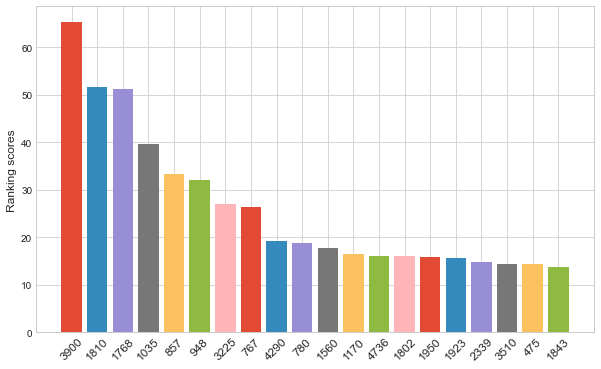

In [331]:
#draw barplot for top 20 rankings from reduced data
bar_data_label=ranking_20_dim.index.values
bar_data=ranking_20_dim.tolist()
ylabel='Ranking scores'
barplot_(bar_data_label, bar_data, ylabel)

# B) Vehicle data PCA analysis (20 points)
• Write a python program to conduct the same analysis as we did in R for the vehicle data in our lecture

• You need to use ALL variables rather than only 11 variables we used.

    – PCA biplot (no dot-based biplot)
    
    – t-SNE biplot
    
    – PCA triplot
    
    – Rank top 20 outliers using PCA and give a reason.

In [332]:
#importing the database

vehicles_data = pd.read_csv("vehicles.csv")
#df.shape
vehicles_data

,Sports,SUV,Wagon,Minivan,Pickup,AWD,RWD,Retail,Dealer,Engine,Cylinders,Horsepower,CityMPG,HighwayMPG,Weight,Wheelbase,Length,Width
Acura 3.5 RL,0,0,0,0,0,0,0,43755,39014,3.5,6,225,18,24,3880,115,197,72
Acura 3.5 RL Navigation,0,0,0,0,0,0,0,46100,41100,3.5,6,225,18,24,3893,115,197,72
Acura MDX,0,1,0,0,0,1,0,36945,33337,3.5,6,265,17,23,4451,106,189,77
Acura NSX S,1,0,0,0,0,0,1,89765,79978,3.2,6,290,17,24,3153,100,174,71
Acura RSX,0,0,0,0,0,0,0,23820,21761,2.0,4,200,24,31,2778,101,172,68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Volvo S80 2.9,0,0,0,0,0,0,0,37730,35542,2.9,6,208,20,28,3576,110,190,72
Volvo S80 T6,0,0,0,0,0,0,0,45210,42573,2.9,6,268,19,26,3653,110,190,72
Volvo V40,0,0,1,0,0,0,0,26135,24641,1.9,4,170,22,29,2822,101,180,68
Volvo XC70,0,0,1,0,0,1,0,35145,33112,2.5,5,208,20,27,3823,109,186,73


In [333]:
#Adding the Label column- which is the label for the data

data1 = vehicles_data.copy()
data1.loc[data1['Sports'] == 1, 'Label'] = 'Sports' 
data1.loc[data1['SUV'] == 1, 'Label'] = 'SUV' 
data1.loc[data1['Wagon'] == 1, 'Label'] = 'Wagon' 
data1.loc[data1['Minivan'] == 1, 'Label'] = 'Minivan'
data1.loc[data1['AWD'] == 1, 'Label'] = 'AWD'
data1.loc[data1['RWD'] == 1, 'Label'] = 'RWD'
data1 = data1.fillna(0)

data1

,Sports,SUV,Wagon,Minivan,Pickup,AWD,RWD,Retail,Dealer,Engine,Cylinders,Horsepower,CityMPG,HighwayMPG,Weight,Wheelbase,Length,Width,Label
Acura 3.5 RL,0,0,0,0,0,0,0,43755,39014,3.5,6,225,18,24,3880,115,197,72,0
Acura 3.5 RL Navigation,0,0,0,0,0,0,0,46100,41100,3.5,6,225,18,24,3893,115,197,72,0
Acura MDX,0,1,0,0,0,1,0,36945,33337,3.5,6,265,17,23,4451,106,189,77,AWD
Acura NSX S,1,0,0,0,0,0,1,89765,79978,3.2,6,290,17,24,3153,100,174,71,RWD
Acura RSX,0,0,0,0,0,0,0,23820,21761,2.0,4,200,24,31,2778,101,172,68,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Volvo S80 2.9,0,0,0,0,0,0,0,37730,35542,2.9,6,208,20,28,3576,110,190,72,0
Volvo S80 T6,0,0,0,0,0,0,0,45210,42573,2.9,6,268,19,26,3653,110,190,72,0
Volvo V40,0,0,1,0,0,0,0,26135,24641,1.9,4,170,22,29,2822,101,180,68,Wagon
Volvo XC70,0,0,1,0,0,1,0,35145,33112,2.5,5,208,20,27,3823,109,186,73,AWD


In [334]:
#PCA of the vehicles dataset
data_pca, evr, pca_components = doPCA(vehicles_data)
data_pca

array([[-1.341e+00, -5.055e-01, -7.392e-01, ...,  3.095e-01,  5.308e-02,
        -1.433e-16],
       [-1.408e+00, -4.275e-01, -7.342e-01, ...,  3.117e-01,  5.542e-02,
        -1.424e-16],
       [-2.280e+00, -1.518e+00,  2.491e+00, ..., -2.532e-01, -6.203e-03,
         3.529e-16],
       ...,
       [ 2.589e+00,  1.105e-01,  2.902e-01, ...,  5.724e-02, -1.320e-02,
        -1.944e-16],
       [ 5.184e-03, -8.197e-01,  1.191e+00, ..., -1.798e-02, -3.177e-02,
        -5.876e-17],
       [-2.676e+00, -1.580e+00,  2.537e+00, ..., -1.175e-01, -4.671e-02,
         3.985e-16]])

In [335]:
data_pca.shape

(387, 18)

In [336]:
#take the inverse transform of the pca data
pca = PCA()
pca.fit(data_pca)
inverse_data_pca = pca.inverse_transform(data_pca)

inverse_data_pca

array([[-1.341e+00, -5.055e-01, -7.392e-01, ...,  3.095e-01,  5.308e-02,
         1.776e-17],
       [-1.408e+00, -4.275e-01, -7.342e-01, ...,  3.117e-01,  5.542e-02,
         1.731e-17],
       [-2.280e+00, -1.518e+00,  2.491e+00, ..., -2.532e-01, -6.203e-03,
        -1.011e-16],
       ...,
       [ 2.589e+00,  1.105e-01,  2.902e-01, ...,  5.724e-02, -1.320e-02,
        -8.267e-17],
       [ 5.184e-03, -8.197e-01,  1.191e+00, ..., -1.798e-02, -3.177e-02,
        -8.199e-17],
       [-2.676e+00, -1.580e+00,  2.537e+00, ..., -1.175e-01, -4.671e-02,
        -6.730e-17]])

In [337]:
inverse_data_pca.shape

(387, 18)

In [338]:
#taking the MSE between the PCA array and the inverse array will show the outliers
MSE_score = ((data_pca - inverse_data_pca)**2).sum(axis=1)
outliers = pd.DataFrame(data = MSE_score, columns = ['MSE Score'])
outliers

,MSE Score
0,1.112484e-28
1,1.021229e-28
2,2.397127e-28
3,1.451511e-28
4,8.407190e-29
...,...
382,4.312725e-29
383,9.039180e-29
384,8.131065e-28
385,9.429898e-28


In [339]:
#sort the dataframe by the MSE Score
outliers = (outliers.sort_values(by = 'MSE Score', ascending = False))
print ('Top 20 outliers')
outliers.head(20)

Top 20 outliers


,MSE Score
143,7.376188e-27
357,5.303485e-27
140,2.528564e-27
299,1.831817e-27
295,1.390434e-27
162,1.369079e-27
20,1.232125e-27
355,1.158540e-27
366,1.149823e-27
126,1.146923e-27


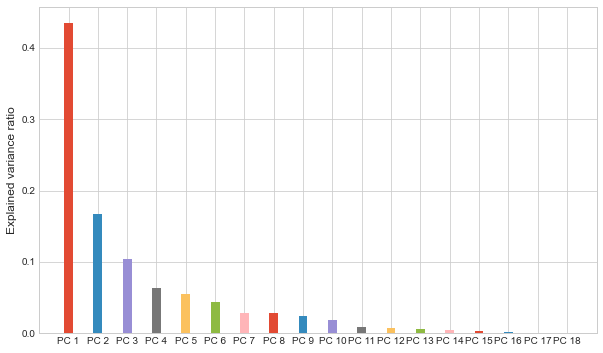

In [340]:
#EVR
Elp_ratio = evr
PC_list=['PC '+ str(i+1) for i in range(len(Elp_ratio))]

fig0 = plt.figure(figsize=(10,6))
#plt.style.use('ggplot')

x_tick=np.arange(len(PC_list))


for i in range(len(x_tick)):
  plt.bar(x_tick[i], Elp_ratio[i], width=0.3)

plt.xticks(x_tick, PC_list)
plt.ylabel('Explained variance ratio')
plt.savefig('Vehicles_EVR.png')
plt.show()


Option info

0          156
RWD         94
AWD         78
SUV         22
Minivan     17
Wagon       12
Sports       8
Name: Label, dtype: int64


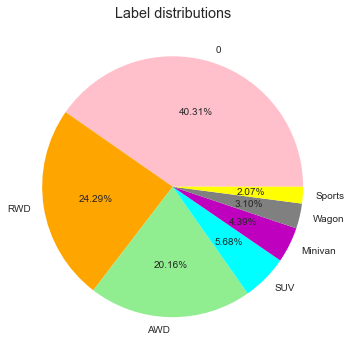

In [341]:
#Label Information
option_counts = data1["Label"].value_counts()
print('\nOption info\n')
print(option_counts)
option_label = option_counts.index

fig = plt.figure(figsize=(10, 6))

sliceColors = ['pink', 'orange', 'lightgreen', 'cyan', 'm',
               'grey', 'yellow','ivory', 'gold', 'lightblue']
plt.pie(option_counts.values, 
        autopct='%.2f%%', 
        labels = option_label,
        colors = sliceColors)
plt.title("Label distributions")
plt.savefig('Vehicles_Labels.png')
plt.show()

In [342]:
type_logical_label={}

for i in range(len(option_counts.values)):
  option_logical_label[i]=data1["Label"] == option_counts.index[i]      

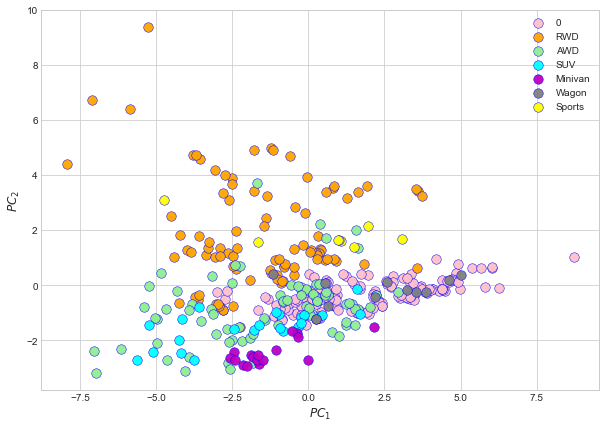

In [343]:
fig = plt.figure(figsize=(10,7))
 
for i in range(len(option_counts.values)):
  plt.scatter(data_pca[option_logical_label[i], 0], data_pca[option_logical_label[i], 1], 
              label=option_label[i],
              marker='o', 
              color=sliceColors[i],
              edgecolors='b', alpha=0.95, s=90)
plt.xlabel('$PC_{1}$')
plt.ylabel('$PC_{2}$')
plt.legend()
plt.savefig('Vehicles_biplot.png')
plt.show()

In [344]:
# Check the option in the labels
def label_options(i):
    
  for k in range(len(option_counts.values)):
    if option_logical_label[k][i] == True:
      return k

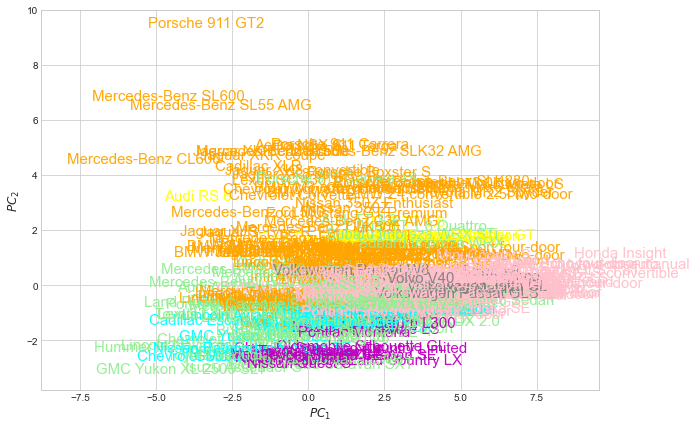

In [345]:
#Biplot

fig=plt.figure(figsize=(10,7))
plt.style.use('seaborn-whitegrid')

for i in range(len(data_pca)):
  plt.scatter(data_pca[i,0], data_pca[i,1], marker='.', 
              c='white', alpha=0.0)
  plt.text(data_pca[i,0], data_pca[i,1], data1.index[i], color=sliceColors[label_options(i)], fontsize=15, alpha=0.95)
    
plt.xlabel('$PC_{1}$')
plt.ylabel('$PC_{2}$')
plt.savefig('biplot.png')
plt.show()

In [346]:
pca_components_df = pd.DataFrame(data=pca_components, index=vehicles_data.columns, 
      columns=['PC ' + str(i+1) for i in range(vehicles_data.shape[1])])

pca_components_df

,PC 1,PC 2,PC 3,PC 4,PC 5,PC 6,PC 7,PC 8,PC 9,PC 10,PC 11,PC 12,PC 13,PC 14,PC 15,PC 16,PC 17,PC 18
Sports,-3.429334e-02,-1.298419e-01,2.888062e-02,-4.809973e-02,-0.000000e+00,-9.278077e-02,-1.174934e-01,-2.591710e-01,-2.576359e-01,-3.395745e-01,-3.262590e-01,-3.117577e-01,3.062720e-01,3.061468e-01,-3.316560e-01,-2.545771e-01,-2.413915e-01,-2.886284e-01
SUV,4.420464e-01,-2.261031e-01,-1.061713e-02,-2.073534e-01,-2.775558e-17,-1.447040e-01,3.751015e-01,3.446906e-01,3.453302e-01,2.187323e-03,7.986514e-02,2.341515e-01,1.692773e-02,4.332889e-02,-1.831792e-01,-3.065679e-01,-2.700992e-01,-2.163172e-01
Wagon,8.754927e-02,4.898468e-01,4.956966e-02,-2.817735e-01,-0.000000e+00,5.505941e-01,-2.415514e-01,1.537860e-02,1.324237e-02,-4.889745e-02,-6.476147e-02,4.029486e-03,-1.421031e-01,-2.486391e-01,8.513379e-02,-2.846344e-01,-3.361432e-01,-1.369171e-01
Minivan,-2.734455e-01,-1.709351e-01,8.754497e-01,-2.999947e-01,-5.551115e-17,8.220097e-02,8.647139e-02,3.728352e-02,4.242730e-02,-2.819738e-03,5.399697e-02,1.982988e-02,6.943729e-03,2.421656e-02,1.528809e-02,6.273610e-02,8.843988e-02,-7.894690e-02
Pickup,3.002586e-01,-2.084706e-01,3.451047e-01,7.610446e-01,-2.775558e-17,2.004881e-01,-5.755496e-02,1.224311e-02,1.010871e-02,-1.050071e-01,-1.476609e-01,-1.893075e-02,-1.472446e-01,-1.534999e-01,3.191124e-02,-8.701157e-02,-1.745790e-01,8.270126e-02
AWD,-2.309268e-01,-1.778257e-01,-1.288234e-01,1.162834e-01,-4.163336e-17,3.507712e-01,-4.155561e-01,4.038788e-01,4.076429e-01,-6.455446e-02,-4.119856e-02,1.245993e-01,3.330558e-01,3.304049e-01,3.276176e-02,6.985923e-02,8.449008e-02,-7.307565e-02
RWD,5.178974e-01,3.151938e-01,2.520107e-01,-8.282711e-02,-1.110223e-16,-1.351460e-01,-2.073445e-01,-2.369556e-02,-3.487013e-02,1.573111e-01,2.925069e-02,3.445202e-03,4.093807e-01,3.146577e-01,8.526805e-02,-3.066970e-02,5.934511e-02,4.416815e-01
Retail,-3.352437e-01,5.050533e-01,6.590686e-02,3.163383e-01,5.551115e-17,-9.874759e-02,4.848074e-01,1.406836e-01,1.444544e-01,-6.724080e-03,2.511159e-02,-1.255386e-01,3.124898e-01,8.966263e-02,1.268327e-01,6.841737e-02,-3.102943e-01,-5.912572e-02
Dealer,-1.299958e-01,2.305088e-01,1.367655e-01,7.637134e-02,-2.775558e-17,-6.711626e-01,-5.032447e-01,1.811249e-01,1.886432e-01,-7.634446e-02,-9.020050e-02,1.033467e-01,-1.841126e-01,-1.879398e-01,-7.988730e-03,-1.081498e-01,-6.532251e-02,-1.530728e-01
Engine,1.125512e-01,1.075086e-01,-1.868623e-02,-1.795446e-01,1.873501e-16,2.699014e-03,2.110618e-01,1.837072e-01,1.867398e-01,-4.868345e-01,-6.311595e-01,-7.855889e-02,-1.321312e-01,-6.671691e-02,6.491969e-02,2.157082e-01,2.308719e-01,2.500326e-01


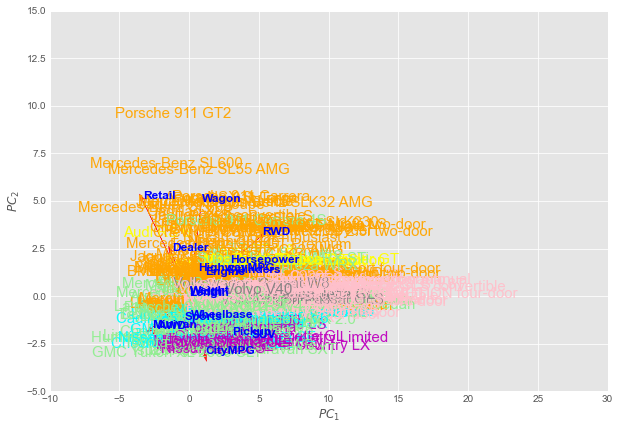

In [347]:
#Triplot
fig = plt.figure(figsize=(10,7))
plt.style.use('ggplot')
for i in range(len(data_pca)):
  plt.scatter(data_pca[i,0], data_pca[i,1], marker='.', 
              c='white', alpha=0.0)
  plt.text(data_pca[i,0], data_pca[i,1], data1.index[i], color=sliceColors[label_options(i)], fontsize=15, alpha=0.95)

# Draw variables
scale=10
for k in range(pca_components_df.shape[1]):
  plt.text(pca_components_df.iloc[k,0]*scale + 0.05, 
           pca_components_df.iloc[k,1]*scale + 0.05, 
           pca_components_df.index[k], c='b', 
           fontweight='bold', fontsize=12)
  plt.arrow(0,0, pca_components_df.iloc[k,0]*scale , pca_components_df.iloc[k,1]*scale,color='r',
            head_width=0.25, linewidth=0.5,alpha=0.9)
plt.xlim((-10, 30))
plt.ylim((-5, 15))
plt.xlabel('$PC_{1}$')
plt.ylabel('$PC_{2}$')
plt.savefig('triplot.png')
plt.show()

# Build label information for the biplot

def doLabeling(data):
  label=[]

  sports=data['Sports'] == 1
  label.append(sports)

  suv=data['SUV'] == 1
  label.append(suv)

  wagon=data['Wagon'] == 1
  label.append(wagon)

  minivan=data['Minivan'] == 1
  label.append(sports)

  pickup=data['Pickup'] == 1
  label.append(pickup)

  awd = data['AWD'] == 1
  label.append(sports)

  rwd = data['RWD'] == 1
  label.append(sports)

  label_name=['sports', 'suv', 'wagon', 'minivan', 'pickup', 'awd', 'rwd']

  return label, label_name

label, label_name = doLabeling(vehicles_data)
label

print('\nLabels')
print('sports:', np.sum(label_name[0]),
      'suv:', np.sum(label_name[1]), 
      'wagon:', np.sum(label_name[2]),
      'minivan:', np.sum(label_name[3]),
      'pickup:', np.sum(label_name[4]),
      'awd:', np.sum(label_name[5]),
      'rwd:', np.sum(label_name[6]))

#biplot visualization
def biplot_ez(newData, label, label_name, Method):

  marker_list=['o','p','d','s', '>']
  c_list=['b','gold', 'y', 'lightblue', 'deepblue']
  e_list=['k','g', 'b', 'r', 'orange']
  for i in range(len(label)):
    plt.scatter(newData[label[i], 0], newData[label[i], 1], label=label_name[i],
                marker=marker_list[i], color=c_list[i], edgecolors=e_list[i],  s=75)

  plt.legend(prop={'size':12})

  if Method=='pca' or Method=='PCA':
    plt.xlabel('$PC_{1}$')
    plt.ylabel('$PC_{2}$')
  elif Method=='spca':
    plt.xlabel('$SPC_{1}$')
    plt.ylabel('$SPC_{2}$')
  else:
    plt.xlabel('$'+ Method +'_{1}'+'$')
    plt.ylabel('$'+ Method +'_{2}'+'$')
  
  plt.grid('on')

# C) Implement PCA by using SVD

In [282]:
from sklearn.decomposition import PCA
import numpy as np 
np.set_printoptions(precision=3)

In [348]:
from numpy.linalg import svd 
def doPCASVD(data):
    
    #convert pd DataFrame to a np array
    data = data.to_numpy()
    data1 = data.copy() 
    data1 -= np.mean(data1, axis=0) 
    n_samples = data1.shape[0]
    print ('After centering')
    print (data1)
    
    #SVD
    U, S, VT = svd(data1, full_matrices=True)
    print ('\n')
    print ('U')
    print (U)
    print ('Shape of U:',U.shape)
    print ('\n')

    print ('S')
    print (S)
    #print ('Shape of S:',S.shape)
    print ('\n')

    print ('VT')
    print (VT)
    print ('Shape of VT:',VT.shape)
    vt_samples = VT.shape[0]
    
    #Build the sigma from S
    Sigma = np.zeros((n_samples, vt_samples), dtype=float)
    Sigma[:vt_samples, :vt_samples] = np.diag(S)
    print ('\n')
    print("Sigma:")
    print(Sigma)
    print (Sigma.shape)
    print ('\n')
    print ('U*Sigma*VT')
    a = np.dot(U, np.dot(Sigma,VT))
    print (a)
    print ('\n')
    print ('Check if both the arrays have the same dimensions')
    check = np.array_equal(np.array(data1.shape),np.array(a.shape))
    if (check == True):
        print (check)
        print ('Dimension of normalized raw data:',data1.shape)
        print ('Dimension of inverse transformed data after PCA:',a.shape)
    else:
        print (check)
        print ('They have different dimensions:')
        print ('Dimension of normalized raw data:',data1.shape)
        print ('Dimension of inverse transformed data after PCA:',a.shape)

In [349]:
data1 = doPCASVD(vehicles_data)

After centering
[[-0.116 -0.152 -0.072 ...  7.788 12.039  0.724]
 [-0.116 -0.152 -0.072 ...  7.788 12.039  0.724]
 [-0.116  0.848 -0.072 ... -1.212  4.039  5.724]
 ...
 [-0.116 -0.152  0.928 ... -6.212 -4.961 -3.276]
 [-0.116 -0.152  0.928 ...  1.788  1.039  1.724]
 [-0.116  0.848 -0.072 ...  5.788  4.039  3.724]]


U
[[ 2.591e-02 -3.453e-02 -5.725e-02 ... -1.007e-02 -1.120e-02 -5.045e-03]
 [ 3.191e-02 -3.346e-02 -6.089e-02 ...  7.440e-03  6.031e-03  1.317e-01]
 [ 8.997e-03 -7.462e-02 -9.821e-04 ...  1.606e-01  1.520e-01 -3.490e-02]
 ...
 [-1.751e-02  5.849e-02  2.090e-02 ...  9.545e-01 -2.781e-02  4.864e-04]
 [ 6.146e-03  1.780e-03  6.927e-02 ... -2.926e-02  9.438e-01 -1.588e-02]
 [ 2.217e-02 -4.696e-02  1.067e-01 ... -6.130e-03 -2.451e-02  9.510e-01]]
Shape of U: (387, 387)


S
[5.233e+05 1.245e+04 1.062e+04 6.657e+02 2.073e+02 8.574e+01 5.303e+01
 3.294e+01 2.177e+01 1.662e+01 7.454e+00 6.176e+00 5.596e+00 5.124e+00
 4.799e+00 3.793e+00 2.989e+00 1.271e-14]


VT
[[ 4.664e-06  3.926e

# PCA analysis for your own finance data (10 points)

In [350]:
#data import- Goldman sachs
gs_data = pd.read_csv('GS.csv')
gs_data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-01-03,94.187500,94.375000,87.750000,88.312500,68.828140,1822600
1,2000-01-04,87.000000,87.500000,82.250000,82.750000,64.492874,1647700
2,2000-01-05,80.875000,81.875000,78.375000,78.875000,61.472832,1516600
3,2000-01-06,78.625000,84.500000,78.625000,82.250000,64.103210,1845100
4,2000-01-07,83.062500,83.187500,79.875000,82.562500,64.346764,1127400
...,...,...,...,...,...,...,...
5317,2021-02-22,313.000000,320.559998,312.209991,316.869995,315.630188,3162300
5318,2021-02-23,317.980011,320.000000,310.579987,319.209991,317.961029,2942500
5319,2021-02-24,320.170013,330.970001,320.100006,330.640015,329.346344,3934400
5320,2021-02-25,333.329987,335.809998,326.290009,327.760010,326.477600,4244000


In [351]:
#Book keeping
gs_data = gs_data.iloc[:,1::] #drop the date column
#rename the columns to align with the functions

columns = []
for i in gs_data:
    i = 'market' + i
    columns.append(i)

gs_data.columns = columns
gs_data

,marketOpen,marketHigh,marketLow,marketClose,marketAdj Close,marketVolume
0,94.187500,94.375000,87.750000,88.312500,68.828140,1822600
1,87.000000,87.500000,82.250000,82.750000,64.492874,1647700
2,80.875000,81.875000,78.375000,78.875000,61.472832,1516600
3,78.625000,84.500000,78.625000,82.250000,64.103210,1845100
4,83.062500,83.187500,79.875000,82.562500,64.346764,1127400
...,...,...,...,...,...,...
5317,313.000000,320.559998,312.209991,316.869995,315.630188,3162300
5318,317.980011,320.000000,310.579987,319.209991,317.961029,2942500
5319,320.170013,330.970001,320.100006,330.640015,329.346344,3934400
5320,333.329987,335.809998,326.290009,327.760010,326.477600,4244000


In [352]:
#Adding the option column- which is the label for the data
data1 = gs_data.copy()
data  = gs_data.copy()
data

,marketOpen,marketHigh,marketLow,marketClose,marketAdj Close,marketVolume
0,94.187500,94.375000,87.750000,88.312500,68.828140,1822600
1,87.000000,87.500000,82.250000,82.750000,64.492874,1647700
2,80.875000,81.875000,78.375000,78.875000,61.472832,1516600
3,78.625000,84.500000,78.625000,82.250000,64.103210,1845100
4,83.062500,83.187500,79.875000,82.562500,64.346764,1127400
...,...,...,...,...,...,...
5317,313.000000,320.559998,312.209991,316.869995,315.630188,3162300
5318,317.980011,320.000000,310.579987,319.209991,317.961029,2942500
5319,320.170013,330.970001,320.100006,330.640015,329.346344,3934400
5320,333.329987,335.809998,326.290009,327.760010,326.477600,4244000


In [353]:
data1.loc[data1['marketOpen'] == data1['marketClose'], 'Option'] = 'ATM' #atm
data1.loc[data1['marketOpen'] > data1['marketClose'], 'Option'] = 'ITM' #itm
data1.loc[data1['marketOpen'] < data1['marketClose'], 'Option'] = 'OTM' #atm
data1

,marketOpen,marketHigh,marketLow,marketClose,marketAdj Close,marketVolume,Option
0,94.187500,94.375000,87.750000,88.312500,68.828140,1822600,ITM
1,87.000000,87.500000,82.250000,82.750000,64.492874,1647700,ITM
2,80.875000,81.875000,78.375000,78.875000,61.472832,1516600,ITM
3,78.625000,84.500000,78.625000,82.250000,64.103210,1845100,OTM
4,83.062500,83.187500,79.875000,82.562500,64.346764,1127400,ITM
...,...,...,...,...,...,...,...
5317,313.000000,320.559998,312.209991,316.869995,315.630188,3162300,OTM
5318,317.980011,320.000000,310.579987,319.209991,317.961029,2942500,OTM
5319,320.170013,330.970001,320.100006,330.640015,329.346344,3934400,OTM
5320,333.329987,335.809998,326.290009,327.760010,326.477600,4244000,ITM



Option info

OTM    2688
ITM    2608
ATM      26
Name: Option, dtype: int64


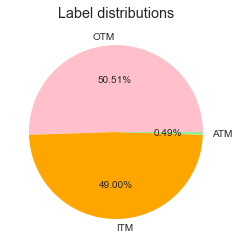

In [354]:
#Label Information

option_counts = data1["Option"].value_counts()
print('\nOption info\n')
print(option_counts)
option_label = option_counts.index

fig = plt.figure(figsize=(6, 4))

sliceColors = ['pink', 'orange', 'lightgreen', 'cyan', 'm',
               'grey', 'yellow','ivory', 'gold', 'lightblue']
plt.pie(option_counts.values, 
        autopct='%.2f%%', 
        labels = option_label,
        colors = sliceColors)
plt.title("Label distributions")
plt.savefig('GS_.png')
plt.show()

In [355]:
#PCA of the vehicles dataset
data_pca, evr, pca_components = doPCA(data)
data_pca

array([[-2.577e+00, -7.424e-01, -7.605e-02,  7.954e-02,  5.894e-02,
        -1.209e-03],
       [-2.822e+00, -7.860e-01, -4.312e-02,  5.856e-02,  4.313e-02,
         1.477e-03],
       [-3.009e+00, -8.193e-01, -1.136e-02,  2.884e-02,  2.246e-02,
         5.012e-03],
       ...,
       [ 7.406e+00,  1.716e-01,  3.516e-01, -1.171e-01,  6.875e-02,
         4.369e-03],
       [ 7.558e+00,  2.334e-01,  2.055e-01,  8.683e-02,  3.749e-02,
         1.364e-02],
       [ 7.242e+00,  1.328e-01,  1.924e-01,  9.591e-02,  4.126e-02,
         2.744e-02]])

In [356]:
EVR

array([3.424e-01, 2.028e-01, 1.849e-01, 1.566e-01, 6.892e-02, 3.404e-02,
       9.786e-03, 4.593e-04, 4.799e-05, 3.416e-06, 2.584e-06, 5.594e-28,
       8.248e-34])

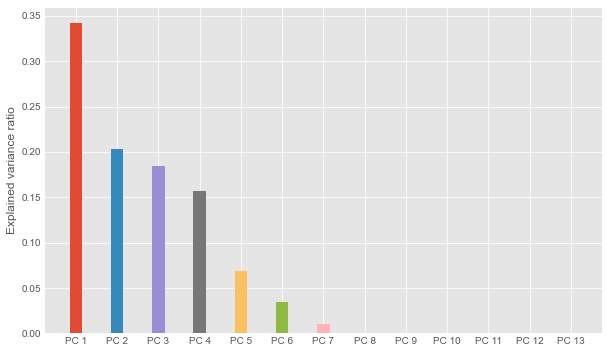

In [357]:
# Explained variance ratio plot
Elp_ratio = EVR
PC_list=['PC '+ str(i+1) for i in range(len(EVR))]

fig0=plt.figure(figsize=(10,6))

x_tick=np.arange(len(PC_list))


for i in range(len(x_tick)):
  plt.bar(x_tick[i], Elp_ratio[i], width=0.3)
plt.xticks(x_tick, PC_list)
plt.ylabel('Explained variance ratio')
plt.savefig('EVR_gs.png')
plt.show()

In [358]:
#pca_components
pca_components_df = pd.DataFrame(data = pca_components, index=data.columns, 
      columns=['PC ' + str(i+1) for i in range(data.shape[1])])

pca_components_df

,PC 1,PC 2,PC 3,PC 4,PC 5,PC 6
marketOpen,0.446805,0.446731,0.447082,0.446937,0.444684,-0.058457
marketHigh,0.033422,0.045167,0.016259,0.031503,0.004201,0.997782
marketLow,-0.254852,-0.212475,-0.236062,-0.183454,0.894398,0.024028
marketClose,0.703379,0.025246,-0.066601,-0.705860,0.044101,-0.001518
marketAdj Close,-0.022804,0.689688,-0.719944,0.068793,-0.018002,-0.020821
marketVolume,-0.488914,0.526249,0.470502,-0.512473,0.004742,0.001048


In [359]:
option_logical_label={}

for i in range(len(option_counts.values)):
  option_logical_label[i]=data1["Option"] == option_counts.index[i]      

In [360]:
#Check the option in the labels
def label_options(i):
    
  for k in range(len(option_counts.values)):
    if option_logical_label[k][i] == True:
      return k

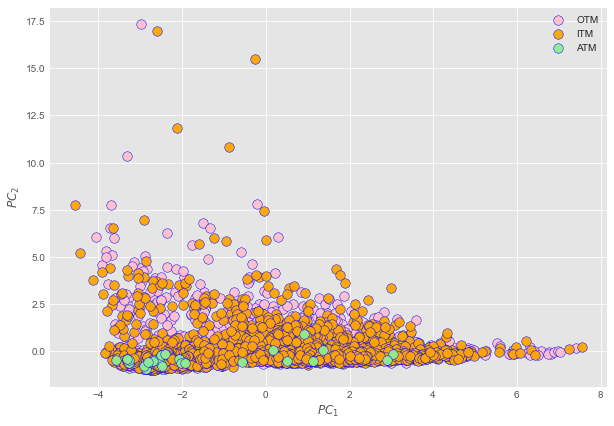

In [361]:
fig = plt.figure(figsize=(10,7))
 
for i in range(len(option_counts.values)):
  plt.scatter(data_pca[option_logical_label[i], 0], data_pca[option_logical_label[i], 1], 
              label=option_label[i],
              marker='o', 
              color=sliceColors[i],
              edgecolors='b', alpha=0.95, s=90)
plt.xlabel('$PC_{1}$')
plt.ylabel('$PC_{2}$')
plt.legend()
plt.savefig('GS_dotbiplot.png')
plt.show()

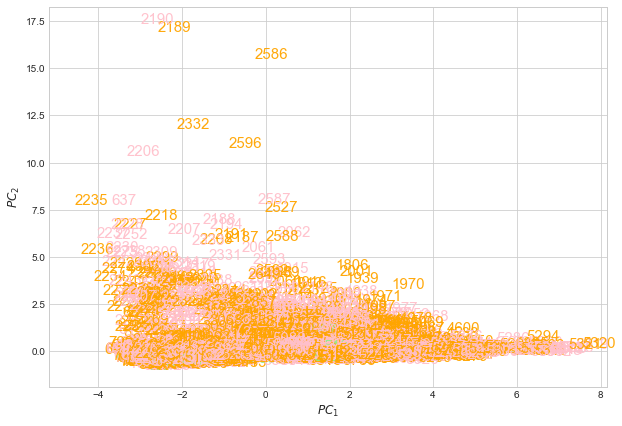

In [362]:
#Biplot

fig=plt.figure(figsize=(10,7))
plt.style.use('seaborn-whitegrid')

for i in range(len(data_pca)):
  plt.scatter(data_pca[i,0], data_pca[i,1], marker='.', 
              c='white', alpha=0.0)
  plt.text(data_pca[i,0], data_pca[i,1], data1.index[i], color=sliceColors[label_options(i)], fontsize=15, alpha=0.95)
    
plt.xlabel('$PC_{1}$')
plt.ylabel('$PC_{2}$')
plt.savefig('biplot_GS.png')
plt.show()

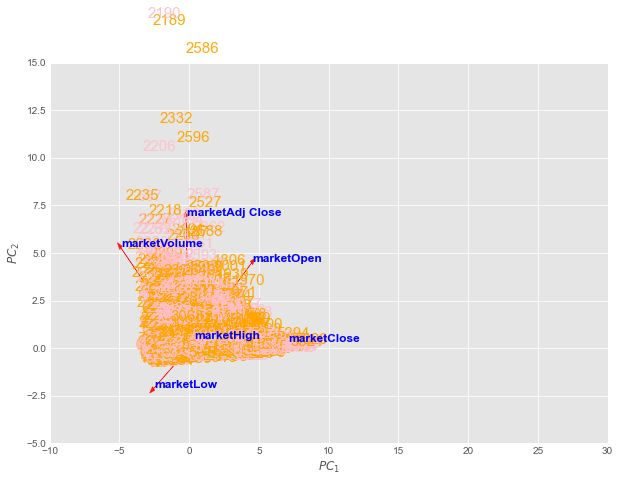

In [363]:
#Triplot
fig = plt.figure(figsize=(10,7))
plt.style.use('ggplot')
for i in range(len(data_pca)):
  plt.scatter(data_pca[i,0], data_pca[i,1], marker='.', 
              c='white', alpha=0.0)
  plt.text(data_pca[i,0], data_pca[i,1], data1.index[i], color=sliceColors[label_options(i)], fontsize=15, alpha=0.95)

# Draw variables
scale=10
for k in range(pca_components_df.shape[1]):
  plt.text(pca_components_df.iloc[k,0]*scale + 0.05, 
           pca_components_df.iloc[k,1]*scale + 0.05, 
           pca_components_df.index[k], c='b', 
           fontweight='bold', fontsize=12)
  plt.arrow(0,0, pca_components_df.iloc[k,0]*scale , pca_components_df.iloc[k,1]*scale,color='r',
            head_width=0.25, linewidth=0.5,alpha=0.9)
plt.xlim((-10, 30))
plt.ylim((-5, 15))
plt.xlabel('$PC_{1}$')
plt.ylabel('$PC_{2}$')
plt.savefig('triplot_GS.png')
plt.show()

In [379]:
#Labels for the TSNE
#label for gs
gs_label, gs_label_name = doLabel(data1)
print('down:', np.sum(gs_label[0]), 'equal:', np.sum(gs_label[1]), 'up:', np.sum(gs_label[2]))

down: 2608 equal: 26 up: 2688


In [380]:
#TSNE of the GS Data
gs_tsne = doTSNE(data, 50, 'random') #perplexity = 50, init = random
gs_tsne
#print ('EVR = ',evr)

array([[-60.893, -25.696],
       [-58.759, -35.86 ],
       [-57.718, -39.926],
       ...,
       [ 63.708,  32.859],
       [ 63.49 ,  32.748],
       [ 63.595,  32.457]], dtype=float32)

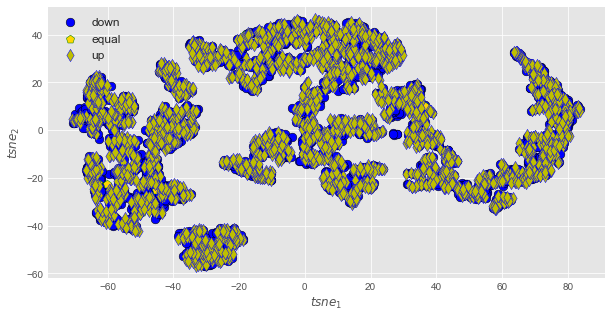

In [383]:
#TSNE biplot
plt.figure(figsize=(10,5))
biplot(gs_tsne, gs_label, gs_label_name, 'tsne')
plt.savefig('GS_TSNE_biplot')